In [1019]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1030]:
#Problem 0) Parse data
data = pd.read_csv('hw3-nces-ed-attainment.csv', na_values = ['---'])
data.isnull()

,Year,Sex,Min degree,Total,White,Black,Hispanic,Asian,Pacific Islander,American Indian/Alaska Native,Two or more races
0,False,False,False,True,False,False,True,True,True,True,True
1,False,False,False,False,False,False,True,True,True,True,True
2,False,False,False,False,False,False,True,True,True,True,True
3,False,False,False,False,False,False,True,True,True,True,True
4,False,False,False,False,False,False,True,True,True,True,True
5,False,False,False,False,False,False,False,True,True,True,True
6,False,False,False,False,False,False,False,True,True,True,True
7,False,False,False,False,False,False,False,True,True,False,True
8,False,False,False,False,False,False,False,True,True,False,True
9,False,False,False,False,False,False,False,False,False,False,False


In [1023]:
data.dtypes

Year                               int64
Sex                               object
Min degree                        object
Total                            float64
White                            float64
Black                            float64
Hispanic                         float64
Asian                            float64
Pacific Islander                 float64
American Indian/Alaska Native    float64
Two or more races                float64
dtype: object

In [516]:
# Problem 1
def completions_between_years (dataframe, year_1, year_2, sex):
    """
    Return dataframe inlcluding the data which match the given sex, and have data between the given years (inclusive for the start, exclusive for the end) 
    """
    btw_years = (dataframe['Year'] >= year_1) & (dataframe['Year'] < year_2)
    given_sex = dataframe['Sex'] == sex
    return dataframe[btw_years & given_sex]

In [517]:
completions_between_years(data, 2007, 2008, 'F')

,Year,Sex,Min degree,Total,White,Black,Hispanic,Asian,Pacific Islander,American Indian/Alaska Native,Two or more races
152,2007,F,high school,89.1,94.2,87.9,70.7,98.5,86.0,90.2,87.9
168,2007,F,associate's,43.2,50.8,28.0,23.5,69.6,42.5,14.5,40.2
186,2007,F,bachelor's,33.0,39.2,20.0,15.4,62.5,32.1,NaN,29.6
202,2007,F,master's,7.6,9.4,3.7,2.6,17.7,NaN,NaN,NaN


In [1002]:
# Problem 2
def compare_bachelors_1980(dt):
    """
    Return a tuple inlcluding the percentanges of men and women
    with a minimum education of bachelor's degrees in 1980.

    Take a dataframe
    """
    year = dt['Year'] == 1980
    m_bachelors = (dt['Sex'] == 'M') & (dt['Min degree'] == "bachelor's")
    w_bachelors = (dt['Sex'] == 'F') & (dt['Min degree'] == "bachelor's")
    return (dt[year & m_bachelors]['Total'].iat[0]),\
        (dt[year & w_bachelors]['Total'].iat[0])


In [1003]:
compare_bachelors_1980(data)

(24.0, 21.0)

In [994]:
# Problem 3
def top_2_2000s(dt):
    """
    Return a list of tuples inlcluding the minimum educations
    and mean percentages of the first and second top level from 2000 to 2010.

    Take a dataframe
    """
    btw_years = (dt['Year'] >= 2000) & (dt['Year'] <= 2010)
    given_sex = dt['Sex'] == 'A'
    sorted_data = dt[btw_years & given_sex].groupby('Min degree').\
    mean().sort_values('Total', ascending=False).head(2)
    return [(sorted_data.index[0], sorted_data.Total[0]),
            (sorted_data.index[1], sorted_data.Total[1])]
    #for row in sorted_data.itertuples():
        #print(row.Index, row.Total)
    #return [(sorted_data.keys()[0],sorted_data[0]),(sorted_data.keys()[1],sorted_data[1])]

In [997]:
top_2_2000s(data)

[('high school', 87.55714285714285), ("associate's", 38.75714285714286)]

In [1006]:
def percent_change_bachelors_2000s(dt, sex='A'):
    """
    Return percent differences as a float between the
    total percents of bachelor's degrees as the minimal
    educational degrees in 2000 and in 2010.

    Take a dataframe and a type of sex.
    If a type of sex is not included as a parameter,
    it will be considered as all individuals.
    """
    earlier_year = dt['Year'] == 2000
    later_year = dt['Year'] == 2010
    earned_degree = dt['Min degree'] == "bachelor's"
    if sex == 'A':
        percent_change = dt[earned_degree & later_year & (dt['Sex'] == 'A')]['Total'].item()\
        - dt[earned_degree & earlier_year & (dt['Sex'] == 'A')]['Total'].item()
    elif sex == 'M':
        percent_change = dt[earned_degree & later_year & (dt['Sex'] == 'M')]['Total'].item()\
        - dt[earned_degree & earlier_year & (dt['Sex'] == 'M')]['Total'].item()
    elif sex == 'F':
        percent_change = dt[earned_degree & later_year & (dt['Sex'] == 'F')]['Total'].item()\
        - dt[earned_degree & earlier_year & (dt['Sex'] == 'F')]['Total'].item()
    return percent_change
    

In [1015]:
def percent_change_bachelors_2000s(dt, sex='A'):
    """
    Return percent differences as a float between the
    total percents of bachelor's degrees as the minimal
    educational degrees in 2000 and in 2010.

    Take a dataframe and a type of sex.
    If a type of sex is not included as a parameter,
    it will be considered as all individuals.
    """
    year_1 = dt['Year'] == 2000
    year_2 = dt['Year'] == 2010
    M_degree = dt['Min degree'] == "bachelor's"

    if sex == 'A':
        percent_change \
            = dt[M_degree & year_2 & (dt['Sex'] == 'A')]['Total'].item()\
            - dt[M_degree & year_1 & (dt['Sex'] == 'A')]['Total'].item()
    elif sex == 'M':
        percent_change \
            = dt[M_degree & year_2 & (dt['Sex'] == 'M')]['Total'].item()\
            - dt[M_degree & year_1 & (dt['Sex'] == 'M')]['Total'].item()
    elif sex == 'F':
        percent_change \
            = dt[M_degree & year_2 & (dt['Sex'] == 'F')]['Total'].item()\
            - dt[M_degree & year_1 & (dt['Sex'] == 'F')]['Total'].item()
    return percent_change


In [1016]:
percent_change_bachelors_2000s(data)

2.599999999999998

In [752]:
data[(data['Min degree'] == "bachelor's") & (data['Sex'] == 'F') & (data['Year'] == 2010)]['Total']

189    35.7
Name: Total, dtype: float64

In [675]:
data[(data['Year'] == 2010) & (data['Sex'] == 'F') &((data['Min degree'] == "bachelor's") | (data['Min degree'] == "master's"))]['Total']

189    35.7
205     8.5
Name: Total, dtype: float64

In [1000]:
# Problem 0) Line Chart
def line_plot_bachelors(dt):
    """
    Take a dataframe and produce a line graph on the total percentages
    of all people with a minimum education of
    bachelor's degrees over years.
    """
    min_degree = (dt['Min degree'] == "bachelor's")
    given_sex = dt['Sex'] == 'A'
    filtered_data = dt[min_degree & given_sex]
    sns.relplot(x='Year', y='Total', data=filtered_data, kind='line')
    plt.savefig('line_plot_bachelors.png')                          

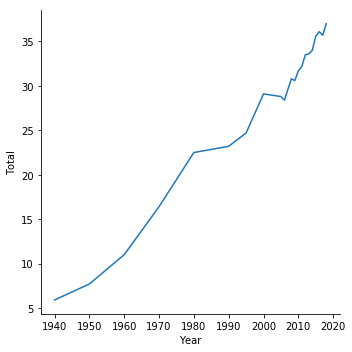

In [1001]:
line_plot_bachelors(data)

In [917]:
# Problem 2) bar Chart
def bar_chart_high_school(dataframe):
    year = dataframe['Year'] == 2009
    min_degree = dataframe['Min degree'] == "high school"
    filtered_data = dataframe[min_degree & year]
    sns.catplot(x = 'Sex', y = 'Total', data=filtered_data, kind='bar') 
    plt.savefig('bar_chart_high_school.png')   

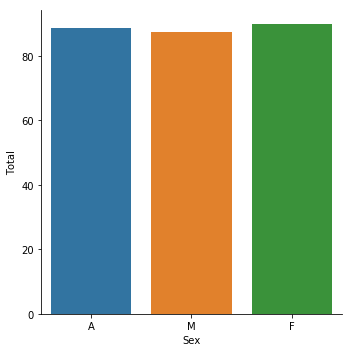

In [918]:
bar_chart_high_school(data)

In [919]:
#Problem 2) Custom Plot
def plot_hispanic_min_degree (dataframe):
    btw_years = (dataframe['Year'] >= 1990) & (dataframe['Year'] <= 2010)
    min_degrees = (data['Min degree'] == "bachelor's") | (data['Min degree'] == "high school")
    given_sex = data['Sex'] == 'A'
    filtered_data = dataframe[min_degrees & btw_years &  given_sex]
    sns.lineplot(x = 'Year' , y = 'Hispanic', data=filtered_data, hue = 'Min degree') 
    plt.savefig('plot_hispanic_min_degree.png')

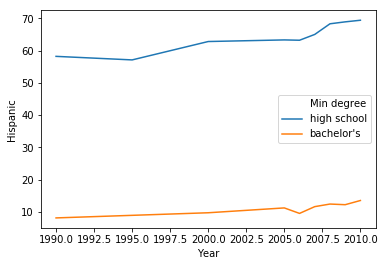

In [920]:
plot_hispanic_min_degree (data)

In [1054]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

def fit_and_predict_degrees(dataframe):
    filtered_data = dataframe[['Year', 'Min degree','Sex','Total']].dropna()
    X = filtered_data.loc[:, filtered_data.columns != 'Total']
    X = pd.get_dummies(X)
    y = filtered_data['Total']
    (X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size = 0.20)
    model = DecisionTreeRegressor()
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    print(y_train_pred)
    print(y_test_pred)
    
    mse_trained = mean_squared_error(y_train, y_train_pred)
    mse_tested = mean_squared_error(y_test, y_test_pred)
    return ('Train MSE:', mse_trained),('Test MSE:', mse_tested)
    

In [956]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

    print('Train accuracy:', accuracy_score(y_train, y_train_pred))
    print('Test accuracy:', accuracy_score(y_test, y_test_pred))


In [1055]:
fit_and_predict_degrees(data)

[42.1 60.7 47.4 85.7  4.5 93.4 23.2 85.8 90.9 38.1 87.4 41.3 28.4  8.7
 33.6 44.4  6.2 30.9 30.8 24.5 89.8  4.7 42.  48.9 87.  92.9  7.2  7.4
 33.2 86.3 84.4 47.9 87.8  9.2  6.3 25.5 46.3 91.5 90.8 34.  34.  89.
 50.1 35.7 89.4 33.8 37.2  9.3 37.   5.9 91.5 27.9  6.1 46.7  7.4  8.8
 51.  45.7 39.4  8.8 46.1 10.5 37.2 31.6 89.1 33.  84.4 89.7 42.8  7.6
 87.5 40.8 37.3 75.4 86.8  7.8 91.9  5.9 89.9 91.8 39.7 90.7 32.2 11.2
 88.5  7.3 38.5  7.7  7.  87.5  8.7 31.7 10.4 36.1 41.1 33.5 37.7 44.1
  6.4 85.4 41.3 86.2 34.8 85.   5.2  5.6  5.1 50.5 51.5 39.3 37.6 92.5
 21.  44.9 87.4 29.1 86.4 88.4 32.1 24.9 91.2 46.1 35.3 22.5 41.5 47.4
 24.7 36.1  7.3 25.3 91.1 91.5  4.9 33.  85.4 89.9  5.4 35.7 94.  38.2
 26.3  5.2 38.9 34.5  7.2 30.2 92.5 84.9 32.  91.7 88.1 88.3 90.5  5.7
  6.3  8.8  5.  39.3  7.  39.5 52.8 29.8 87.  10.7 32.2 34.7 28.8 30.1
 43.2]
[37.2 29.8  8.7 87.8 31.7 38.2 21.  41.5 29.8 37.6 35.7  8.8 87.   5.2
  6.2 32.  30.9  7.4 33.8 90.5  5.  33.  29.8 86.3 34.  34.   7.4 22.5


(('Train MSE:', 0.0), ('Test MSE:', 3.407209302325583))